In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
df = pd.read_csv('yelp_labelled.txt', delimiter = "\t", names=['Comment', 'Sentiment'])
df.head(10)

,Comment,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


I'm going to check if I can create a feature based upon comment length. I will create a comment length column and conditionally describe both positive and negative reviews to see if there is a difference that I can reasonably make into a feature.

In [13]:
df['Comment length'] = df['Comment'].apply(len)

In [15]:
df[df['Sentiment'] == 0].describe()

,Sentiment,Comment length
count,500.0,500.000000
mean,0.0,60.750000
std,0.0,34.224935
min,0.0,11.000000
25%,0.0,33.000000
50%,0.0,52.500000
75%,0.0,84.000000
max,0.0,149.000000


In [16]:
df[df['Sentiment'] == 1].describe()

,Sentiment,Comment length
count,500.0,500.00000
mean,1.0,55.88200
std,0.0,30.22839
min,1.0,11.00000
25%,1.0,32.75000
50%,1.0,49.50000
75%,1.0,73.25000
max,1.0,148.00000


Unfortonately, comment length doesn't really differ between positive and negative reviews, so I will turn elsewhere for features. 

I will create keywords features. I am only going to focus on negative words, as some of the most common such as "not" or "didn't" could be accompanied by positive words. So to keep from confusing the model, I will only have it search for negative words. The absence of such will imply a positive review.

In [18]:
keywords = ["not", "bad", "didn't", "worst", "poor", "slow"]

for key in keywords:
    df[str(key)] = df.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

             not       bad    didn't     worst      poor      slow
not     1.000000  0.038338 -0.038467 -0.031942 -0.023760  0.016931
bad     0.038338  1.000000 -0.010937 -0.009082 -0.006756 -0.007404
didn't -0.038467 -0.010937  1.000000 -0.010937 -0.008136 -0.008917
worst  -0.031942 -0.009082 -0.010937  1.000000 -0.006756 -0.007404
poor   -0.023760 -0.006756 -0.008136 -0.006756  1.000000 -0.005508
slow    0.016931 -0.007404 -0.008917 -0.007404 -0.005508  1.000000


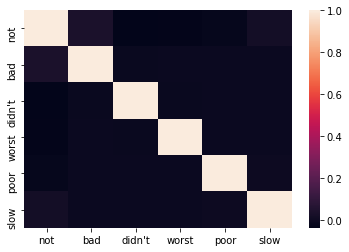

In [22]:
#Check for any correlation between these feature keywords
print(df[keywords].corr())
sns.heatmap(df[keywords].corr())

There is clearly no correlation between the keyword features, so I will not have to run any PCA to combine any.

In [27]:
data = df[keywords]
target = df['Sentiment']

In [28]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

# Fit our model to the data
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 402


This does not seem like a great success rate. But I am having trouble figuring out other features that I can use with my current knowledge level. I tried googling and reading different articles, but everything available seemed way over my head. What else can I do to make simple features?